In [1]:
import gym
import multiworld

#from multiworld.envs.mujoco.cameras import sawyer_init_camera_zoomed_in

pygame 2.0.1 (SDL 2.0.14, Python 3.7.4)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
multiworld.register_all_envs()

In [4]:
env = gym.make('SawyerPushNIPSEasy-v0')

In [5]:
#env.initialize_camera(sawyer_init_camera_zoomed_in)

In [6]:
obs = env.reset()

In [7]:
obs

{'observation': array([-0.01997255,  0.50003716,  0.        ,  0.6       ]),
 'state_observation': array([-0.01997255,  0.50003716,  0.        ,  0.6       ]),
 'desired_goal': array([ 0.04145491,  0.6004046 , -0.01362889,  0.51762743]),
 'state_desired_goal': array([ 0.04145491,  0.6004046 , -0.01362889,  0.51762743]),
 'achieved_goal': array([-0.01997255,  0.50003716,  0.        ,  0.6       ]),
 'state_achieved_goal': array([-0.01997255,  0.50003716,  0.        ,  0.6       ]),
 'puck_pos': array([0. , 0.6]),
 'hand_pos': array([-0.01997255,  0.50003716])}

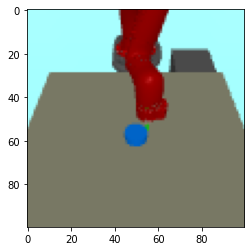

In [15]:
obs, _, _, _ = env.step(env.action_space.sample())

img = env.render(mode='rgb_array', height=100, width=100)

plt.imshow(img)
plt.show()

In [22]:
env.get_env_state()

(MjSimState(time=0.8000000000000006, qpos=array([ 1.78020229e+00, -5.57726290e-01, -3.37009458e-01,  2.08170025e+00,
         1.32170386e+00,  2.92621215e-01,  2.03069780e+00,  2.47738504e-09,
         6.00000000e-01,  1.59710079e-02,  9.99999990e-01,  3.05766105e-05,
        -3.78462492e-06,  1.38684523e-04,  4.14549141e-02,  6.00404602e-01,
         2.09686080e-02,  7.07106781e-01,  1.48979724e-14,  7.07106781e-01,
        -1.48999170e-14, -1.36288851e-02,  5.17627434e-01,  2.09686080e-02,
         7.07106781e-01,  0.00000000e+00,  7.07106781e-01,  0.00000000e+00]), qvel=array([ 3.00707464e-05,  1.99868111e-02, -7.16463398e-03, -1.36315461e-01,
        -3.41812320e-01,  4.51673942e-02,  3.62216901e-01,  3.13289795e-09,
         2.82392718e-09, -2.38862995e-10, -3.01384452e-07,  5.45378584e-08,
        -1.05119800e-12,  1.65653890e-18,  7.70371978e-34,  4.74388729e-17,
        -1.56517101e-47,  8.08856883e-17,  8.57886234e-30, -1.65653890e-18,
        -1.65653890e-18,  4.72887278e-17,

In [23]:
obs

{'observation': array([-4.10131200e-02,  5.58107740e-01,  2.47111924e-09,  6.00000000e-01]),
 'state_observation': array([-4.10131200e-02,  5.58107740e-01,  2.47111924e-09,  6.00000000e-01]),
 'desired_goal': array([ 0.04145491,  0.6004046 , -0.01362889,  0.51762743]),
 'state_desired_goal': array([ 0.04145491,  0.6004046 , -0.01362889,  0.51762743]),
 'achieved_goal': array([-4.10131200e-02,  5.58107740e-01,  2.47111924e-09,  6.00000000e-01]),
 'state_achieved_goal': array([-4.10131200e-02,  5.58107740e-01,  2.47111924e-09,  6.00000000e-01]),
 'puck_pos': array([2.47111924e-09, 6.00000000e-01]),
 'hand_pos': array([-0.04101312,  0.55810774])}

In [1]:
from omegaconf import OmegaConf

cfg_path = f"../conf/config.yaml"

env_name = 'pusher'

cfg = OmegaConf.load(cfg_path)
env_cfg = OmegaConf.load(f'../conf/env/{env_name}.yaml')
env_cfg.action_repeat=1
cfg = OmegaConf.merge(cfg, env_cfg)

/private/home/linamezghani/.conda/envs/polybeast/lib/python3.7/site-packages/omegaconf/resolvers/__init__.py:13: UserWarning: The `env` resolver is deprecated, see https://github.com/omry/omegaconf/issues/573
  "The `env` resolver is deprecated, see https://github.com/omry/omegaconf/issues/573"


In [2]:
print(cfg.env)

{'id': 'pusher', 'success_thresh': 1.0, 'max_episode_steps': 100, 'action_repeat': 1, 'random_start_pos': False, 'obs': {'type': 'vec', 'state_size': 4, 'vec_size': 4, 'rgb_size': 64, 'no_velocity_size': 4}, 'action_dim': 2, 'frame_stack': 1, 'obs_type': 'vec'}


In [3]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import envs
import utils

space_info = utils.get_space_info(cfg.env.obs, cfg.env.action_dim)

In [4]:
env = envs.make_env(cfg.env, space_info)

pygame 2.0.1 (SDL 2.0.14, Python 3.7.4)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [5]:
env.goals.keys()

dict_keys(['state', 'vec_obs', 'rgb_obs'])

In [6]:
obs = env.reset()

In [7]:
obs

{'time': 0.0,
 'state': array([-0.01997255,  0.50003716,  0.        ,  0.6       ]),
 'goal_state': array([-3.92270440e-04,  6.25207595e-01, -7.06286893e-02,  5.53919207e-01]),
 'obs': array([-0.01997255,  0.50003716,  0.        ,  0.6       ]),
 'goal_obs': array([-3.92270440e-04,  6.25207595e-01, -7.06286893e-02,  5.53919207e-01])}

In [8]:
obs, reward, done, info = env.step(env.action_space.sample()) 

In [9]:
obs

{'time': 0.01,
 'state': array([-1.84280185e-02,  5.32966186e-01,  5.37093232e-10,  6.00000000e-01]),
 'goal_state': array([-3.92270440e-04,  6.25207595e-01, -7.06286893e-02,  5.53919207e-01]),
 'obs': array([-1.84280185e-02,  5.32966186e-01,  5.37093232e-10,  6.00000000e-01]),
 'goal_obs': array([-3.92270440e-04,  6.25207595e-01, -7.06286893e-02,  5.53919207e-01])}

In [10]:
reward

-0.08433179274469355

In [11]:
done

False

In [12]:
info

{'oracle_distance': 0.08433179274469355,
 'oracle_success': True,
 'hand_distance': 0.09398811530021094,
 'puck_distance': 0.08433179274469355}